# Evaluating Clusters

Let's import the datasets

In [1]:
import pandas as pd

movie_sent_clust = pd.read_csv("movie_sent_clust.csv", index_col=0)
movie_clusters = pd.read_csv("movie_clusters.csv", index_col=0)

Display movie_sent_clust

In [2]:
movie_sent_clust

,movie_id,intelligent,real,touching,relatable,sad,romantic,informative,mean,fake,...,KM6,KM7,KM8,GMM7_PCA,GMM8_PCA,GMM9_PCA,GMM10_PCA,ward_8,ward_9,ward_10
0,8984,0.189474,0.147368,0.242105,0.168421,0.073684,0.431579,0.200000,0.094737,0.021053,...,3,3,7,3,2,0,0,8,9,10
1,8985,0.137500,0.187500,0.275000,0.162500,0.025000,0.450000,0.100000,0.037500,0.050000,...,4,3,6,3,2,0,0,8,9,10
2,8986,0.103093,0.051546,0.247423,0.092784,0.010309,0.556701,0.051546,0.000000,0.030928,...,4,3,6,3,2,0,0,8,9,10
3,8987,0.063158,0.094737,0.294737,0.073684,0.031579,0.589474,0.042105,0.000000,0.052632,...,4,3,6,3,2,0,0,8,9,10
4,8988,0.193548,0.225806,0.215054,0.172043,0.053763,0.247312,0.182796,0.064516,0.064516,...,3,5,7,6,7,8,8,7,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,13526,0.042105,0.031579,0.042105,0.147368,0.031579,0.084211,0.031579,0.010526,0.042105,...,1,4,2,1,0,3,7,6,7,8
2614,13527,0.329670,0.043956,0.098901,0.043956,0.120879,0.010989,0.010989,0.021978,0.010989,...,2,0,5,0,3,7,1,3,3,3
2615,13528,0.018868,0.037736,0.037736,0.018868,0.018868,0.000000,0.018868,0.037736,0.075472,...,5,1,3,2,6,4,4,1,1,1
2616,13529,0.125786,0.037736,0.113208,0.056604,0.106918,0.006289,0.025157,0.000000,0.012579,...,2,0,1,0,5,7,9,5,5,5


Splitting sentiments and clusters and removing movie_id columns

In [3]:
movie_sent = movie_sent_clust.iloc[:, 0:45] 
clusters = movie_sent_clust.iloc[:, 45:] 
movie_sent = movie_sent.drop(['movie_id'], axis=1)

Here in "movie_sent" we have the "sentiments" and the derived variables

In [4]:
movie_sent
movie_sent_VIF = movie_sent.copy
cols = movie_sent.columns
cols

Index(['intelligent', 'real', 'touching', 'relatable', 'sad', 'romantic',
       'informative', 'mean', 'fake', 'glamorous', 'original', 'predictable',
       'fresh', 'mindless', 'unrelatable', 'imaginative', 'wholesome',
       'inspiring', 'shallow', 'edgy', 'fastpaced', 'disturbing', 'dramatic',
       'outrageous', 'exciting', 'calming', 'slow', 'unoriginal', 'uplifting',
       'sexy', 'deep', 'scary', 'thirlling_susp', 'fun_funny',
       'info_real_int_insp', 'fun_outrag_mindless',
       'fastpaced_thrilling_exciting', 'scary_dist_edgy_thrill',
       'origi_imagin_fresh_imag', 'sad_dramatic_deep_touching',
       'fake_unrel_unorig_predic', 'sexy_glam_rom',
       'touching_wholesome_uplifting', 'mean_edgy'],
      dtype='object')

Here in "clusters" we have the "clutsters" variables

In [5]:
clusters

,KM6,KM7,KM8,GMM7_PCA,GMM8_PCA,GMM9_PCA,GMM10_PCA,ward_8,ward_9,ward_10
0,3,3,7,3,2,0,0,8,9,10
1,4,3,6,3,2,0,0,8,9,10
2,4,3,6,3,2,0,0,8,9,10
3,4,3,6,3,2,0,0,8,9,10
4,3,5,7,6,7,8,8,7,8,9
...,...,...,...,...,...,...,...,...,...,...
2613,1,4,2,1,0,3,7,6,7,8
2614,2,0,5,0,3,7,1,3,3,3
2615,5,1,3,2,6,4,4,1,1,1
2616,2,0,1,0,5,7,9,5,5,5


Here you can see the number of clusters for each variable

In [6]:
clusters.nunique()

KM6           6
KM7           7
KM8           8
GMM7_PCA      7
GMM8_PCA      8
GMM9_PCA      9
GMM10_PCA    10
ward_8        8
ward_9        9
ward_10      10
dtype: int64

- KM are cluster variables created via K-mean clustering
- GMM are cluster variables created via Gaussian mixture models
- ward_c is a cluster variable created via hierarchical clustering



## To count the number of observations in each cluster run the following code

just run dataset_name.cluster_variable.value_counts()

In this case I'm using the cluster dataset I created before.

In [7]:
clusters.KM6.value_counts()

2    643
1    552
4    422
3    365
0    327
5    309
Name: KM6, dtype: int64

(KM starts counting from 0)

Let's analyze km6. To do it, we need to put it "back" in the old matrix (excluding the other clusters).
Below is the code to add at the end of the dataframe the cluster variable.



In [8]:
movie_sent['KM6'] = clusters.KM6   #substitute km6 with another cluster vairable to insert it
movie_sent

,intelligent,real,touching,relatable,sad,romantic,informative,mean,fake,glamorous,...,fun_outrag_mindless,fastpaced_thrilling_exciting,scary_dist_edgy_thrill,origi_imagin_fresh_imag,sad_dramatic_deep_touching,fake_unrel_unorig_predic,sexy_glam_rom,touching_wholesome_uplifting,mean_edgy,KM6
0,0.189474,0.147368,0.242105,0.168421,0.073684,0.431579,0.200000,0.094737,0.021053,0.105263,...,0.143860,0.161404,0.084211,0.142105,0.147368,0.071053,0.217544,0.182456,0.094737,3
1,0.137500,0.187500,0.275000,0.162500,0.025000,0.450000,0.100000,0.037500,0.050000,0.125000,...,0.133333,0.083333,0.043750,0.156250,0.131250,0.081250,0.220833,0.220833,0.043750,4
2,0.103093,0.051546,0.247423,0.092784,0.010309,0.556701,0.051546,0.000000,0.030928,0.072165,...,0.147766,0.089347,0.020619,0.095361,0.095361,0.074742,0.230241,0.274914,0.015464,4
3,0.063158,0.094737,0.294737,0.073684,0.031579,0.589474,0.042105,0.000000,0.052632,0.031579,...,0.108772,0.045614,0.015789,0.092105,0.113158,0.097368,0.228070,0.263158,0.005263,4
4,0.193548,0.225806,0.215054,0.172043,0.053763,0.247312,0.182796,0.064516,0.064516,0.139785,...,0.182796,0.200717,0.112903,0.174731,0.142473,0.083333,0.161290,0.143369,0.096774,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,0.042105,0.031579,0.042105,0.147368,0.031579,0.084211,0.031579,0.010526,0.042105,0.010526,...,0.421053,0.150877,0.068421,0.150000,0.047368,0.026316,0.084211,0.049123,0.100000,1
2614,0.329670,0.043956,0.098901,0.043956,0.120879,0.010989,0.010989,0.021978,0.010989,0.032967,...,0.040293,0.542125,0.373626,0.288462,0.222527,0.010989,0.084249,0.040293,0.214286,2
2615,0.018868,0.037736,0.037736,0.018868,0.018868,0.000000,0.018868,0.037736,0.075472,0.018868,...,0.094340,0.264151,0.424528,0.066038,0.061321,0.066038,0.025157,0.018868,0.094340,5
2616,0.125786,0.037736,0.113208,0.056604,0.106918,0.006289,0.025157,0.000000,0.012579,0.025157,...,0.115304,0.446541,0.172956,0.243711,0.205975,0.017296,0.014675,0.077568,0.031447,2


Now we have to evaluate correlation between the cluster variables, the sentiments and the derived variables.
First of all we need to create binary variable starting from the cluster variable.
Example: if a variable has 3 clusters, we are going to have 3 dummy variables, one for each cluster.

In [9]:
dummies = pd.get_dummies(movie_sent['KM6']) #substitute km6 with another cluster variable
movie_sent = pd.concat([movie_sent, dummies], axis = 1)
movie_sent

,intelligent,real,touching,relatable,sad,romantic,informative,mean,fake,glamorous,...,sexy_glam_rom,touching_wholesome_uplifting,mean_edgy,KM6,0,1,2,3,4,5
0,0.189474,0.147368,0.242105,0.168421,0.073684,0.431579,0.200000,0.094737,0.021053,0.105263,...,0.217544,0.182456,0.094737,3,0,0,0,1,0,0
1,0.137500,0.187500,0.275000,0.162500,0.025000,0.450000,0.100000,0.037500,0.050000,0.125000,...,0.220833,0.220833,0.043750,4,0,0,0,0,1,0
2,0.103093,0.051546,0.247423,0.092784,0.010309,0.556701,0.051546,0.000000,0.030928,0.072165,...,0.230241,0.274914,0.015464,4,0,0,0,0,1,0
3,0.063158,0.094737,0.294737,0.073684,0.031579,0.589474,0.042105,0.000000,0.052632,0.031579,...,0.228070,0.263158,0.005263,4,0,0,0,0,1,0
4,0.193548,0.225806,0.215054,0.172043,0.053763,0.247312,0.182796,0.064516,0.064516,0.139785,...,0.161290,0.143369,0.096774,3,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,0.042105,0.031579,0.042105,0.147368,0.031579,0.084211,0.031579,0.010526,0.042105,0.010526,...,0.084211,0.049123,0.100000,1,0,1,0,0,0,0
2614,0.329670,0.043956,0.098901,0.043956,0.120879,0.010989,0.010989,0.021978,0.010989,0.032967,...,0.084249,0.040293,0.214286,2,0,0,1,0,0,0
2615,0.018868,0.037736,0.037736,0.018868,0.018868,0.000000,0.018868,0.037736,0.075472,0.018868,...,0.025157,0.018868,0.094340,5,0,0,0,0,0,1
2616,0.125786,0.037736,0.113208,0.056604,0.106918,0.006289,0.025157,0.000000,0.012579,0.025157,...,0.014675,0.077568,0.031447,2,0,0,1,0,0,0


as you can see, at the end of movie_Sent we have new binary variables, one for each cluster. (python starts counting from 0, so if you have 6 groups, you have number fom 0 to 5)

Now it's time to compute a correlation matrix to see the relationship between the cluster, the variables and the derived variables.

To do this, we need to drop the column with all the cluster variable for a better visualization.

EXTREMELY IMPORTANT! I'm trying to build a code to analyze the clusters, but sometimes you need to change something to make it work for your analysis. In this case I reduced the correlation matrix for a better and easier visualization.
you have to modify it according to the cluster you are evaluating.
I created a dataset, called subset, that we're going to use for building the correlation matrix

In [10]:
subset = movie_sent.drop(['KM6'], axis=1)  #substitute km6 with another cluster variable
subset

,intelligent,real,touching,relatable,sad,romantic,informative,mean,fake,glamorous,...,fake_unrel_unorig_predic,sexy_glam_rom,touching_wholesome_uplifting,mean_edgy,0,1,2,3,4,5
0,0.189474,0.147368,0.242105,0.168421,0.073684,0.431579,0.200000,0.094737,0.021053,0.105263,...,0.071053,0.217544,0.182456,0.094737,0,0,0,1,0,0
1,0.137500,0.187500,0.275000,0.162500,0.025000,0.450000,0.100000,0.037500,0.050000,0.125000,...,0.081250,0.220833,0.220833,0.043750,0,0,0,0,1,0
2,0.103093,0.051546,0.247423,0.092784,0.010309,0.556701,0.051546,0.000000,0.030928,0.072165,...,0.074742,0.230241,0.274914,0.015464,0,0,0,0,1,0
3,0.063158,0.094737,0.294737,0.073684,0.031579,0.589474,0.042105,0.000000,0.052632,0.031579,...,0.097368,0.228070,0.263158,0.005263,0,0,0,0,1,0
4,0.193548,0.225806,0.215054,0.172043,0.053763,0.247312,0.182796,0.064516,0.064516,0.139785,...,0.083333,0.161290,0.143369,0.096774,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,0.042105,0.031579,0.042105,0.147368,0.031579,0.084211,0.031579,0.010526,0.042105,0.010526,...,0.026316,0.084211,0.049123,0.100000,0,1,0,0,0,0
2614,0.329670,0.043956,0.098901,0.043956,0.120879,0.010989,0.010989,0.021978,0.010989,0.032967,...,0.010989,0.084249,0.040293,0.214286,0,0,1,0,0,0
2615,0.018868,0.037736,0.037736,0.018868,0.018868,0.000000,0.018868,0.037736,0.075472,0.018868,...,0.066038,0.025157,0.018868,0.094340,0,0,0,0,0,1
2616,0.125786,0.037736,0.113208,0.056604,0.106918,0.006289,0.025157,0.000000,0.012579,0.025157,...,0.017296,0.014675,0.077568,0.031447,0,0,1,0,0,0


subset has 50 columns as you can see. We want to obtain a matrix that has as column the cluster binary variable obtained with the function get_dummies. In this case, since we have 50 columns and 6 binary cluster variables, we can conclude that the last 6 variables (from 44 to 50) are the cluster variables. 44:50 in programming means "from 44 to 50".

Same way, we can conclude that variables 1 to 45 (1:44) are sentiments and derived variables.

The clusters variables start from the column number "46", then you have to put the upper limit according to the number of clusters you are evaluating.

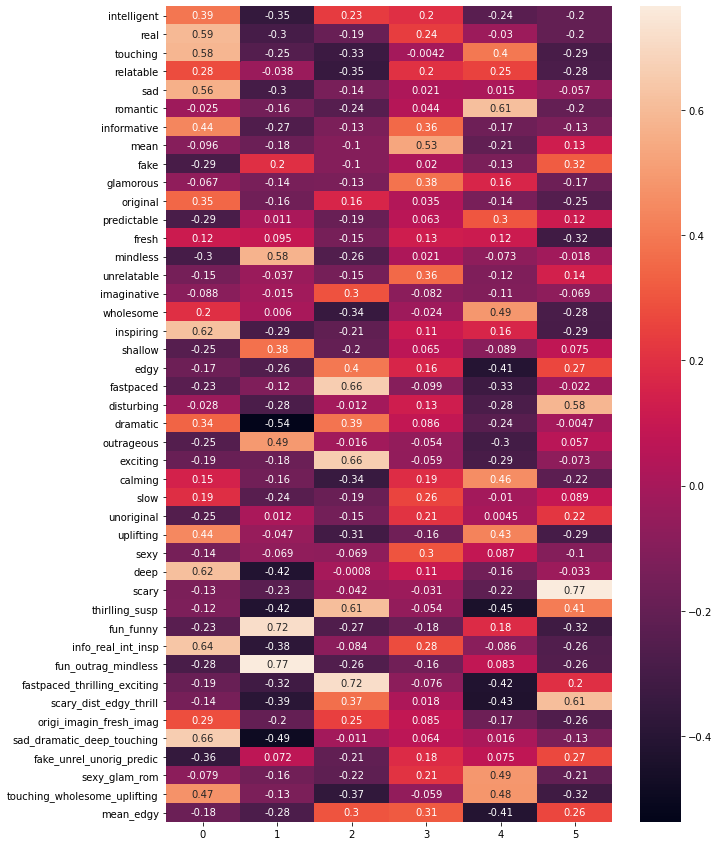

In [11]:
import seaborn as sns
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(10,15))



c= subset.corr()
c = c.iloc[:, 44:50] #insert the right numbers for the cluster variables
c = c.iloc[0:44, :] #this should be always the same, no need to modify
c

sns.heatmap(c, annot=True)

You should obtain a matrix with the sentimets in rows and clusters in columns.

In c is stored the correlation matrix

In [12]:
c

,0,1,2,3,4,5
intelligent,0.390846,-0.354553,0.231492,0.196931,-0.235180,-0.204476
real,0.594607,-0.296806,-0.188758,0.236494,-0.029772,-0.202183
touching,0.583051,-0.248129,-0.329786,-0.004189,0.397687,-0.292506
relatable,0.277809,-0.038367,-0.346794,0.204798,0.253922,-0.282752
sad,0.564259,-0.300467,-0.135917,0.021158,0.015474,-0.057338
romantic,-0.024797,-0.155033,-0.244489,0.043874,0.614296,-0.199607
informative,0.440013,-0.267530,-0.127071,0.356558,-0.168419,-0.133970
mean,-0.096378,-0.179474,-0.102170,0.532654,-0.207200,0.126263
fake,-0.292784,0.198141,-0.104444,0.019841,-0.134779,0.321154
glamorous,-0.066876,-0.135957,-0.134037,0.379596,0.162698,-0.173713


You can visualize the distribution of a variable (sentiment or derived) in each clusters. You can do it easily with a boxplot. You need just to change the y value to the variable you're interested in and x value to the cluster variable.

In this case, y=intelligent takes into consideration the variable intelligent, and x="ward_c" is saying to do the boxplots for each cluster.

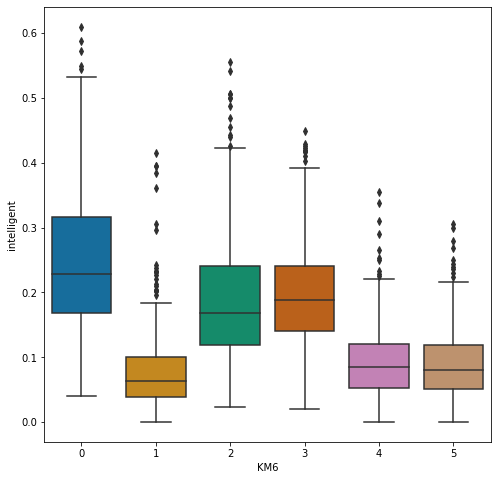

In [13]:
from matplotlib import pyplot

a4_dims = (8, 8) ### to make a bigger image just change this values

fig, ax = pyplot.subplots(figsize=a4_dims)

sns.boxplot(y='intelligent', x='KM6', 
                 data=movie_sent, 
                 palette="colorblind")


To evaluate if a distribution is the same among clusters (there is no change in it no matter what clusters you're analysing) we can use a tukey HSD test. It's very similar to the anova and easy to understand.

Basically it tells you if the mean of a variable is the same for each couple of cluster.
Here a couple of articles about it. Please read it. they're very short an easy to understand.

chrome-extension://oemmndcbldboiebfnladdacbdfmadadm/https://academic.udayton.edu/gregelvers/psy217/labs2014/TukeyMC.pdf

https://www.statisticshowto.com/tukey-test-honest-significant-difference/

in poor words : 

reject = True 

means that the mean of the variable is not the same across the groups. reject = False is the opposite.

Use this test to evaluate variables that you think are STRONGLY correlated or MEANINGFUL for the cluster.

for example, if cluster 2 is related with "intelligent" movies, or I think intelligent is really meaningful for cluster, I want that each time group 1 is compared with other clusters, I want "reject = True" for most of the comparisons.

under "group1" and "group2" there are the clusters evaluated. The first row, for example, compares the mean of the variable intellingent between cluster 1 and cluster 2, and the result is "TRUE" (there are differneces in the mean between the groups, as you can see from the boxplot above).



(movie_sent['intelligent'], movie_sent['KM6']) is the key for the code. Change intelligent with the variable you want to analyze and "KM6" with the cluster variable you're working with.

In [14]:
import statsmodels.formula.api as smf
import statsmodels.stats.multicomp as multi

mc1 = multi.MultiComparison(movie_sent['intelligent'], movie_sent['KM6'])  # Change cluster variable and sentiment
res1 = mc1.tukeyhsd() 
print(res1.summary())


Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.1741  0.001 -0.1899 -0.1584   True
     0      2  -0.0636  0.001  -0.079 -0.0483   True
     0      3  -0.0552  0.001 -0.0724  -0.038   True
     0      4   -0.159  0.001 -0.1756 -0.1424   True
     0      5  -0.1613  0.001 -0.1792 -0.1434   True
     1      2   0.1105  0.001  0.0974  0.1236   True
     1      3   0.1189  0.001  0.1037  0.1342   True
     1      4   0.0151 0.0371  0.0005  0.0297   True
     1      5   0.0129 0.2002 -0.0032  0.0289  False
     2      3   0.0085 0.5673 -0.0063  0.0232  False
     2      4  -0.0954  0.001 -0.1095 -0.0812   True
     2      5  -0.0976  0.001 -0.1133  -0.082   True
     3      4  -0.1038  0.001 -0.1199 -0.0877   True
     3      5  -0.1061  0.001 -0.1235 -0.0886   True
     4      5  -0.0023    0.9 -0.0192  0.0146  False
----------------------------------------------

Now it's time for some descriptive statistic (mean and standard deviation basically).

Here there is the mean for each variable per each cluster.

In [15]:
m1= movie_sent.groupby('KM6').mean().T
m1

KM6,0,1,2,3,4,5
intelligent,0.252037,0.077910,0.188394,0.196851,0.093035,0.090761
real,0.248087,0.050128,0.072558,0.157192,0.096786,0.052111
touching,0.333740,0.083397,0.071278,0.141503,0.255037,0.043858
relatable,0.133700,0.081196,0.046592,0.119009,0.123577,0.035882
sad,0.239172,0.029030,0.063778,0.093228,0.091479,0.072029
romantic,0.119497,0.077171,0.053946,0.151047,0.384510,0.032782
informative,0.179829,0.032284,0.058146,0.155375,0.043982,0.045559
mean,0.020757,0.017758,0.023233,0.072148,0.013674,0.040300
fake,0.017462,0.063297,0.040885,0.050079,0.035962,0.082868
glamorous,0.036527,0.032101,0.033548,0.094160,0.064731,0.021202


Here is the heatmap of the previous table for a better visualization

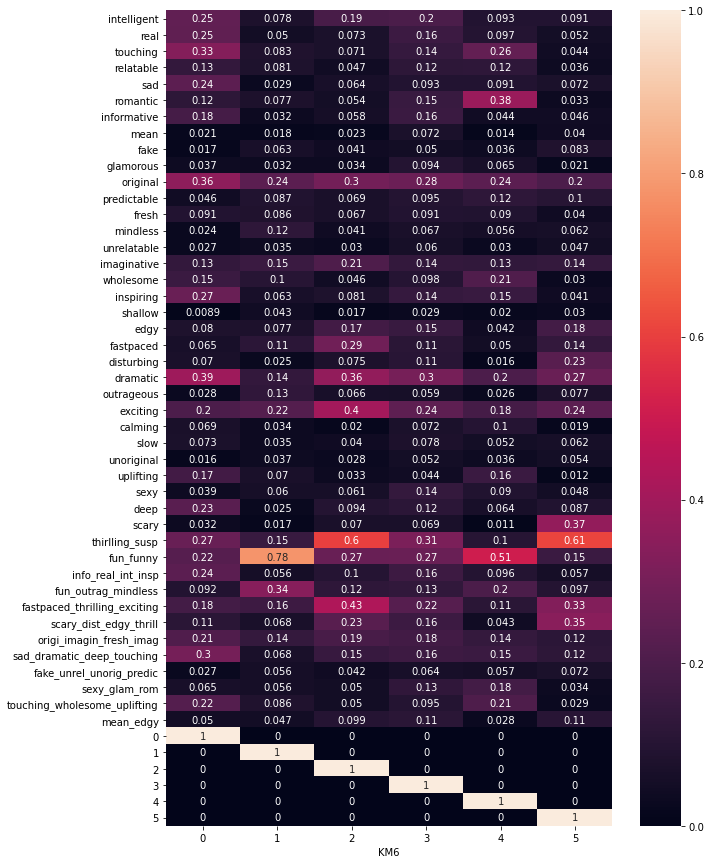

In [16]:
import seaborn as sns
from matplotlib import pyplot

fig, ax = pyplot.subplots(figsize=(10,15))

sns.heatmap(m1, annot=True)

This code instead displays the descriptive statistic of the sentiments for a single cluster.

The key of the code is 

movie_sent['KM6'] = clusters.KM6
cluster_1 = movie_sent[movie_sent["KM6"] == 1]

Now we are displaing the descriptive statistics of the sentimets for the cluster number 1.

change "KM6" with your cluster variable and in == 1 change the number 1 with the cluster number you want to analyze.

In [17]:
pd.set_option("display.max_columns", None)


movie_sent = movie_sent.iloc[:, 0:43]
movie_sent['KM6'] = clusters.KM6
cluster_1 = movie_sent[movie_sent["KM6"] == 1]
cluster_1.describe()

,intelligent,real,touching,relatable,sad,romantic,informative,mean,fake,glamorous,original,predictable,fresh,mindless,unrelatable,imaginative,wholesome,inspiring,shallow,edgy,fastpaced,disturbing,dramatic,outrageous,exciting,calming,slow,unoriginal,uplifting,sexy,deep,scary,thirlling_susp,fun_funny,info_real_int_insp,fun_outrag_mindless,fastpaced_thrilling_exciting,scary_dist_edgy_thrill,origi_imagin_fresh_imag,sad_dramatic_deep_touching,fake_unrel_unorig_predic,sexy_glam_rom,touching_wholesome_uplifting,KM6
count,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.000000,552.0
mean,0.077910,0.050128,0.083397,0.081196,0.029030,0.077171,0.032284,0.017758,0.063297,0.032101,0.235878,0.087456,0.085843,0.121937,0.035283,0.153008,0.104618,0.063065,0.043420,0.076810,0.114806,0.024890,0.136454,0.125170,0.219560,0.033760,0.034567,0.036787,0.069655,0.059981,0.025082,0.017450,0.152102,0.781003,0.055847,0.342703,0.162156,0.067813,0.138160,0.068491,0.055706,0.056418,0.085890,1.0
std,0.057126,0.044058,0.059904,0.057764,0.029732,0.099929,0.031279,0.020855,0.043546,0.037240,0.089219,0.045040,0.040899,0.064627,0.024694,0.082821,0.077801,0.040702,0.032693,0.054927,0.082158,0.030576,0.062316,0.079214,0.085893,0.027229,0.028160,0.028529,0.044504,0.078881,0.022484,0.030261,0.106584,0.121553,0.028911,0.061644,0.082198,0.036995,0.050987,0.028795,0.025716,0.057160,0.050763,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.030000,0.000000,0.000000,0.000000,0.000000,0.010101,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020408,0.000000,0.040000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.140000,0.000000,0.153846,0.034632,0.005952,0.037500,0.015152,0.006098,0.000000,0.004762,1.0
25%,0.038911,0.023810,0.037856,0.038961,0.010309,0.020408,0.012195,0.000000,0.036585,0.012048,0.172559,0.053333,0.059881,0.074415,0.012987,0.089460,0.040303,0.031831,0.020000,0.037037,0.060241,0.009877,0.088984,0.063291,0.159894,0.012500,0.012500,0.012658,0.037037,0.012500,0.010204,0.000000,0.073440,0.736305,0.034375,0.303703,0.104026,0.040579,0.103125,0.047933,0.037500,0.020080,0.045212,1.0
50%,0.062829,0.037037,0.073171,0.064578,0.020833,0.039539,0.025000,0.012346,0.051747,0.022989,0.223544,0.081993,0.080808,0.111111,0.032607,0.134983,0.083333,0.059406,0.037037,0.064103,0.096386,0.014286,0.126449,0.109756,0.202703,0.026491,0.027027,0.031250,0.061728,0.036145,0.021053,0.010363,0.117647,0.810000,0.050633,0.340171,0.143426,0.058642,0.131282,0.065862,0.053125,0.037037,0.075985,1.0
75%,0.100000,0.069444,0.114560,0.109756,0.040101,0.088454,0.042629,0.025641,0.084594,0.040816,0.284544,0.116883,0.108108,0.158537,0.050000,0.200505,0.150000,0.086420,0.061303,0.102041,0.151086,0.031579,0.175000,0.169177,0.271605,0.049629,0.050000,0.051282,0.093333,0.074074,0.037500,0.020254,0.207317,0.865854,0.071124,0.380592,0.196787,0.087541,0.161429,0.086642,0.069181,0.071949,0.120570,1.0
max,0.414634,0.317073,0.390244,0.444444,0.242105,0.657895,0.278481,0.150000,0.367347,0.323529,0.601942,0.271605,0.292683,0.414634,0.153061,0.411290,0.451220,0.234568,0.185185,0.345679,0.564706,0.292683,0.360000,0.447059,0.506024,0.164835,0.213592,0.141026,0.234568,0.705128,0.160494,0.236842,0.526316,0.965909,0.216463,0.536585,0.460526,0.195122,0.397260,0.207317,0.206633,0.337607,0.260163,1.0


In [18]:
movie_sent

,intelligent,real,touching,relatable,sad,romantic,informative,mean,fake,glamorous,original,predictable,fresh,mindless,unrelatable,imaginative,wholesome,inspiring,shallow,edgy,fastpaced,disturbing,dramatic,outrageous,exciting,calming,slow,unoriginal,uplifting,sexy,deep,scary,thirlling_susp,fun_funny,info_real_int_insp,fun_outrag_mindless,fastpaced_thrilling_exciting,scary_dist_edgy_thrill,origi_imagin_fresh_imag,sad_dramatic_deep_touching,fake_unrel_unorig_predic,sexy_glam_rom,touching_wholesome_uplifting,KM6
0,0.189474,0.147368,0.242105,0.168421,0.073684,0.431579,0.200000,0.094737,0.021053,0.105263,0.189474,0.168421,0.073684,0.052632,0.021053,0.115789,0.242105,0.168421,0.021053,0.094737,0.073684,0.031579,0.210526,0.021053,0.252632,0.126316,0.073684,0.073684,0.063158,0.115789,0.063158,0.052632,0.157895,0.357895,0.176316,0.143860,0.161404,0.084211,0.142105,0.147368,0.071053,0.217544,0.182456,3
1,0.137500,0.187500,0.275000,0.162500,0.025000,0.450000,0.100000,0.037500,0.050000,0.125000,0.237500,0.175000,0.100000,0.025000,0.025000,0.150000,0.250000,0.237500,0.012500,0.050000,0.037500,0.050000,0.200000,0.012500,0.162500,0.112500,0.050000,0.075000,0.137500,0.087500,0.025000,0.025000,0.050000,0.362500,0.165625,0.133333,0.083333,0.043750,0.156250,0.131250,0.081250,0.220833,0.220833,4
2,0.103093,0.051546,0.247423,0.092784,0.010309,0.556701,0.051546,0.000000,0.030928,0.072165,0.144330,0.185567,0.082474,0.082474,0.010309,0.051546,0.340206,0.144330,0.010309,0.030928,0.020619,0.000000,0.092784,0.000000,0.195876,0.185567,0.082474,0.072165,0.237113,0.061856,0.030928,0.000000,0.051546,0.360825,0.087629,0.147766,0.089347,0.020619,0.095361,0.095361,0.074742,0.230241,0.274914,4
3,0.063158,0.094737,0.294737,0.073684,0.031579,0.589474,0.042105,0.000000,0.052632,0.031579,0.178947,0.242105,0.073684,0.052632,0.042105,0.052632,0.326316,0.157895,0.031579,0.010526,0.000000,0.000000,0.105263,0.000000,0.094737,0.168421,0.031579,0.052632,0.168421,0.063158,0.021053,0.010526,0.042105,0.273684,0.089474,0.108772,0.045614,0.015789,0.092105,0.113158,0.097368,0.228070,0.263158,4
4,0.193548,0.225806,0.215054,0.172043,0.053763,0.247312,0.182796,0.064516,0.064516,0.139785,0.236559,0.107527,0.139785,0.086022,0.075269,0.129032,0.150538,0.225806,0.075269,0.129032,0.075269,0.064516,0.193548,0.032258,0.344086,0.193548,0.075269,0.086022,0.064516,0.096774,0.107527,0.075269,0.182796,0.430108,0.206989,0.182796,0.200717,0.112903,0.174731,0.142473,0.083333,0.161290,0.143369,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,0.042105,0.031579,0.042105,0.147368,0.031579,0.084211,0.031579,0.010526,0.042105,0.010526,0.347368,0.031579,0.073684,0.221053,0.021053,0.136842,0.073684,0.063158,0.084211,0.189474,0.221053,0.031579,0.105263,0.221053,0.189474,0.010526,0.031579,0.010526,0.031579,0.157895,0.010526,0.010526,0.042105,0.821053,0.042105,0.421053,0.150877,0.068421,0.150000,0.047368,0.026316,0.084211,0.049123,1
2614,0.329670,0.043956,0.098901,0.043956,0.120879,0.010989,0.010989,0.021978,0.010989,0.032967,0.483516,0.032967,0.076923,0.010989,0.000000,0.263736,0.010989,0.032967,0.010989,0.406593,0.362637,0.186813,0.461538,0.065934,0.483516,0.021978,0.021978,0.000000,0.010989,0.208791,0.208791,0.120879,0.780220,0.043956,0.104396,0.040293,0.542125,0.373626,0.288462,0.222527,0.010989,0.084249,0.040293,2
2615,0.018868,0.037736,0.037736,0.018868,0.018868,0.000000,0.018868,0.037736,0.075472,0.018868,0.132075,0.132075,0.000000,0.094340,0.000000,0.113208,0.018868,0.037736,0.037736,0.150943,0.056604,0.377358,0.132075,0.075472,0.094340,0.000000,0.037736,0.056604,0.000000,0.056604,0.056604,0.528302,0.641509,0.113208,0.028302,0.094340,0.264151,0.424528,0.066038,0.061321,0.066038,0.025157,0.018868,5
2616,0.125786,0.037736,0.113208,0.056604,0.106918,0.006289,0.025157,0.000000,0.012579,0.025157,0.389937,0.018868,0.037736,0.012579,0.018868,0.421384,0.075472,0.188679,0.

## Using Random Forest to evaluate features

I just remembered that to evaluate clusters, we can use the random forest to identify the most important features to predict a if an observation is in cluster X or not (like logit regression).
To do so, we need to split the cluster variable in dummies. 

EXAMPLE : In this case From a variable with 6 categories (KM6), we want 6 binary variable (see them at the end of the dataframe)


In [19]:
a = pd.get_dummies(movie_sent, columns = ['KM6'])
a

,intelligent,real,touching,relatable,sad,romantic,informative,mean,fake,glamorous,original,predictable,fresh,mindless,unrelatable,imaginative,wholesome,inspiring,shallow,edgy,fastpaced,disturbing,dramatic,outrageous,exciting,calming,slow,unoriginal,uplifting,sexy,deep,scary,thirlling_susp,fun_funny,info_real_int_insp,fun_outrag_mindless,fastpaced_thrilling_exciting,scary_dist_edgy_thrill,origi_imagin_fresh_imag,sad_dramatic_deep_touching,fake_unrel_unorig_predic,sexy_glam_rom,touching_wholesome_uplifting,KM6_0,KM6_1,KM6_2,KM6_3,KM6_4,KM6_5
0,0.189474,0.147368,0.242105,0.168421,0.073684,0.431579,0.200000,0.094737,0.021053,0.105263,0.189474,0.168421,0.073684,0.052632,0.021053,0.115789,0.242105,0.168421,0.021053,0.094737,0.073684,0.031579,0.210526,0.021053,0.252632,0.126316,0.073684,0.073684,0.063158,0.115789,0.063158,0.052632,0.157895,0.357895,0.176316,0.143860,0.161404,0.084211,0.142105,0.147368,0.071053,0.217544,0.182456,0,0,0,1,0,0
1,0.137500,0.187500,0.275000,0.162500,0.025000,0.450000,0.100000,0.037500,0.050000,0.125000,0.237500,0.175000,0.100000,0.025000,0.025000,0.150000,0.250000,0.237500,0.012500,0.050000,0.037500,0.050000,0.200000,0.012500,0.162500,0.112500,0.050000,0.075000,0.137500,0.087500,0.025000,0.025000,0.050000,0.362500,0.165625,0.133333,0.083333,0.043750,0.156250,0.131250,0.081250,0.220833,0.220833,0,0,0,0,1,0
2,0.103093,0.051546,0.247423,0.092784,0.010309,0.556701,0.051546,0.000000,0.030928,0.072165,0.144330,0.185567,0.082474,0.082474,0.010309,0.051546,0.340206,0.144330,0.010309,0.030928,0.020619,0.000000,0.092784,0.000000,0.195876,0.185567,0.082474,0.072165,0.237113,0.061856,0.030928,0.000000,0.051546,0.360825,0.087629,0.147766,0.089347,0.020619,0.095361,0.095361,0.074742,0.230241,0.274914,0,0,0,0,1,0
3,0.063158,0.094737,0.294737,0.073684,0.031579,0.589474,0.042105,0.000000,0.052632,0.031579,0.178947,0.242105,0.073684,0.052632,0.042105,0.052632,0.326316,0.157895,0.031579,0.010526,0.000000,0.000000,0.105263,0.000000,0.094737,0.168421,0.031579,0.052632,0.168421,0.063158,0.021053,0.010526,0.042105,0.273684,0.089474,0.108772,0.045614,0.015789,0.092105,0.113158,0.097368,0.228070,0.263158,0,0,0,0,1,0
4,0.193548,0.225806,0.215054,0.172043,0.053763,0.247312,0.182796,0.064516,0.064516,0.139785,0.236559,0.107527,0.139785,0.086022,0.075269,0.129032,0.150538,0.225806,0.075269,0.129032,0.075269,0.064516,0.193548,0.032258,0.344086,0.193548,0.075269,0.086022,0.064516,0.096774,0.107527,0.075269,0.182796,0.430108,0.206989,0.182796,0.200717,0.112903,0.174731,0.142473,0.083333,0.161290,0.143369,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2613,0.042105,0.031579,0.042105,0.147368,0.031579,0.084211,0.031579,0.010526,0.042105,0.010526,0.347368,0.031579,0.073684,0.221053,0.021053,0.136842,0.073684,0.063158,0.084211,0.189474,0.221053,0.031579,0.105263,0.221053,0.189474,0.010526,0.031579,0.010526,0.031579,0.157895,0.010526,0.010526,0.042105,0.821053,0.042105,0.421053,0.150877,0.068421,0.150000,0.047368,0.026316,0.084211,0.049123,0,1,0,0,0,0
2614,0.329670,0.043956,0.098901,0.043956,0.120879,0.010989,0.010989,0.021978,0.010989,0.032967,0.483516,0.032967,0.076923,0.010989,0.000000,0.263736,0.010989,0.032967,0.010989,0.406593,0.362637,0.186813,0.461538,0.065934,0.483516,0.021978,0.021978,0.000000,0.010989,0.208791,0.208791,0.120879,0.780220,0.043956,0.104396,0.040293,0.542125,0.373626,0.288462,0.222527,0.010989,0.084249,0.040293,0,0,1,0,0,0
2615,0.018868,0.037736,0.037736,0.018868,0.018868,0.000000,0.018868,0.037736,0.075472,0.018868,0.132075,0.132075,0.000000,0.094340,0.000000,0.113208,0.018868,0.037736,0.037736,0.150943,0.056604,0.377358,0.132075,0.075472,0.094340,0.000000,0.037736,0.056604,0.000000,0.056604,0.056604,0.528302,0.641509,0.113208,0.028302,0.094340,0.264151,0.424528,0.066038,0.061321,0.066038,0.025157,0.018868,0,0,0,0,0,1
2616,0.125786,0.037736,0.113208,0.056

Divide into X and y. y contains the cluster to evaluate, X contains just the numerical features

In [20]:
y = a[['KM6_0']]
X = movie_sent_VIF

### SIMPLY, HIGHER THE VALUE HIGHER THE IMPORTANCE

Feature: 0, Score: 0.00929
Feature: 1, Score: 0.01263
Feature: 2, Score: 0.00861
Feature: 3, Score: 0.01066
Feature: 4, Score: 0.01246
Feature: 5, Score: 0.05250
Feature: 6, Score: 0.01191
Feature: 7, Score: 0.08028
Feature: 8, Score: 0.03840
Feature: 9, Score: 0.00913
Feature: 10, Score: 0.01247
Feature: 11, Score: 0.00953
Feature: 12, Score: 0.00892
Feature: 13, Score: 0.00895
Feature: 14, Score: 0.10615
Feature: 15, Score: 0.04628
Feature: 16, Score: 0.01222
Feature: 17, Score: 0.01225
Feature: 18, Score: 0.01124
Feature: 19, Score: 0.01080
Feature: 20, Score: 0.00934
Feature: 21, Score: 0.00785
Feature: 22, Score: 0.00876
Feature: 23, Score: 0.01203
Feature: 24, Score: 0.00910
Feature: 25, Score: 0.12308
Feature: 26, Score: 0.02141
Feature: 27, Score: 0.01121
Feature: 28, Score: 0.07009
Feature: 29, Score: 0.07892
Feature: 30, Score: 0.01026
Feature: 31, Score: 0.00890
Feature: 32, Score: 0.01084
Feature: 33, Score: 0.00931
Feature: 34, Score: 0.03152
Feature: 35, Score: 0.00976
Fe

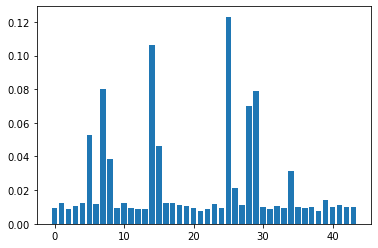

In [21]:
# random forest for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=44, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

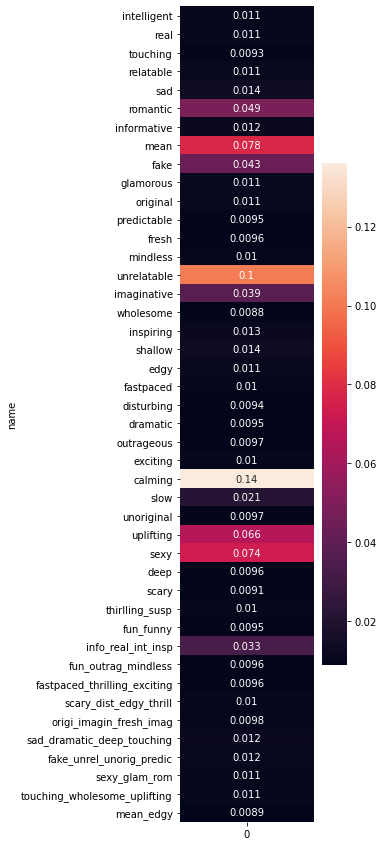

In [22]:
importance = pd.DataFrame(importance)
importance['name'] = cols
importance = importance.set_index('name')

fig, ax = pyplot.subplots(figsize=(3,15))

sns.heatmap(importance, annot=True)